In [12]:
# importing
import numpy as np
import pandas as pd
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as plt


In [30]:
# create data set of different number of gaussian groups in different dimension with different means and different covariance matrices. each one should have its own samples and labels

def generate_gaussian_groups(n_groups, n_samples, dim):
    datasets = []
    for i in range(n_groups):
        mean = np.random.uniform(-10, 10, dim)
        cov = make_spd_matrix(dim)
        data = np.random.multivariate_normal(mean, cov, n_samples)
        labels = np.full(n_samples, i)
        df = pd.DataFrame(data, columns=[f'feature_{j}' for j in range(dim)])
        df['label'] = labels
        datasets.append(df)
    # reorder the dataframe with random order
    datasets = pd.concat(datasets).sample(frac=1).reset_index(drop=True) # shuffle rows
    return datasets

def plot_gaussian_groups(datasets):
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']  # Add more colors if needed

    dataset_labels = datasets['label'].unique()
    for label in dataset_labels:
        df = datasets[datasets['label'] == label]
        plt.scatter(df['feature_0'], df['feature_1'], color=colors[label % len(colors)], label=f'Group {label}')
    plt.xlabel('feature_0')
    plt.ylabel('feature_1')
    plt.legend()
    plt.title('Gaussian Groups (features 0 and 1)')
    plt.show()


   feature_0  feature_1  feature_2  feature_3  feature_4  label
0   0.199287  -5.755797  -0.891855   3.934649   2.955369      2
1  -7.394094  -0.597618 -11.027675  -9.729806   4.554603      1
2  -6.711266  -1.467098 -11.629261  -7.994116   6.574930      1
3   2.955408  -1.879085   7.013695   2.160616  -7.049722      0
4   0.310102  -3.567386  -4.116021   1.988844   2.118187      2


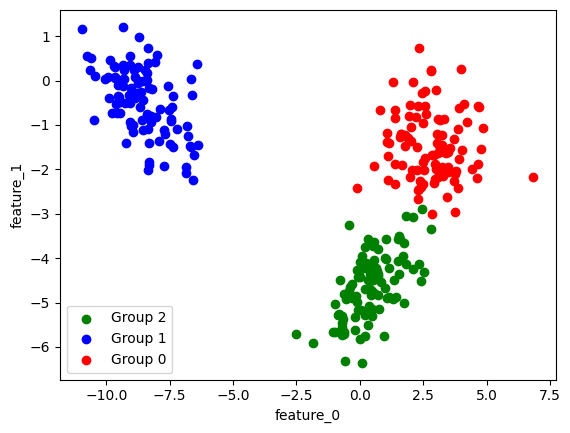

In [29]:
# Example usage:
n_groups = 3
n_samples = 100
dim = 5
dataset = generate_gaussian_groups(n_groups, n_samples, dim)

print("sample data:")
print(dataset.head())

# plot each group and color it differently
plot_gaussian_groups(dataset)
